# Linear Regression GP 1

***

### GP 1 Goals

Performing simple linear regression and understanding evaluation metrics.

- Run a simple linear regression model in statsmodels or scikit-learn.
- Discuss the real-world implications of the model results.

## Related Lessons

 - [Simple Linear Regression Lab](https://github.com/learn-co-curriculum/dsc-simple-linear-regression-lab/tree/solution) 

  - [Interpreting Significance and P-values](https://github.com/learn-co-curriculum/dsc-significance-p-value)

  - [Coefficient of Determination Lab](https://github.com/learn-co-curriculum/dsc-coefficient-of-determination-lab/tree/solution)

 - [OLS Statsmodels Lab](https://github.com/learn-co-curriculum/dsc-ols-statsmodels-lab/tree/solution)

 - [Complete Regression Lab](https://github.com/learn-co-curriculum/dsc-complete-regression-lab/tree/solution)
 
    - Topics 

  - How to interpret the results from a simple linear regression model and discuss their real-world implications.
- What multiple linear regression is and why it is useful for solving real-world problems.
- How to run a multiple linear regression model in Python using statsmodels.

### First Goal

- To understand how well our model is able to **predict** future conditions, trends, or **values**.

Question 1: Does our regression line fit the data well?

We make predictions on train and test data and measure the error to understand how well our model will generalize when making new predictions.

###### Scope

* We analyze the performance between the train and test predictions using various metrics:
    - MAE
    - MSE
    - RMSE
    - $R^2$
    - Adjusted $R^2$

### Second Goal

* To determine and **measure** the **relationships** between the dependent and independent variables.

Question 2: Are the coefficients statistically significant?

### Third Goal

* To **understand** how one variable **changes** when another changes

Question 3: What is the economic impact of the estimated coefficients?

##### Scope

* The coefficients and p-values are able to inform us of the influence that an independent variable has on the dependent variable.

    - Coefficients
    - $p-value$

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# This is an example sample size. When conducting regression modeling 
# it is generally agreed that sample size be a minimum of 20-30 instances.

# Why?

# hours spent on project
x = [34, 35, 39, 42, 43, 47]

# project score
y = [78, 75, 86, 91, 88, 98]

In [3]:
# What are the independent and dependent variables (answer in markdown)


In [4]:
# create pandas DataFrame


In [5]:
# plot our data (try scatter)


This data appears linear in nature. This is great news as it a sign that our variables share a linear relationship. 

At this point, it is important to keep the assumptions of linear regression in mind as model our data. If these assumption are not met, we can not be confident in the accuracy of our model. The assumptions we will explore in this notebook are:

- Linearity: there is a linear relationship between the independent and dependent variables
- Homoscedasticity: the variance for the residual is the same for any value of x
- Independence: observations are independent of one another
- Normality: residuals are normally distributed

Now let's fit a linear regression model to this data.

In [6]:
# https://www.statsmodels.org/stable/regression.html
# import statsmodels library from statsmodels api
import statsmodels.api as sm

# create predictors


# add a constant that represents beta_nought


# fit model to data usingthe existing x and y as arguments.


## Ordinary least Squares

Recall the goal of OLS, minimize the sum of the squares of the differences.

$$ \hat y = \hat\beta_0 + \hat\beta_1 x$$

where $\hat\beta_0 $ is the constant of the equation, and $ \hat\beta_1 $ is the slope.

In [7]:
# display model coefficients


### Coefficients

$$ \hat y = 20.516 + 1.63 x$$

With the coefficients we can acheive the goals of linear regression:
    
    - To determine and measure the relationships between the dependent and independent variables
    
    - To understand how one variable changes when another changes

***Coefficients***: The coefficient of the feature describe the mathematical relationship between each independent variable and the dependent variable, which in this case is the project score. 

The coefficient value helps us understand the marginal effect of the features on the dependent variable. 

**Given a one-unit change in hours, how much is the score changed**?

In [8]:
# Answer here


**If a student spent `0` hours on their project, what score does our model predict the student will have?**

In [ ]:
# Answer here


They also **inform us if there is a positive or negative correlation between the features and target**.

$$ \hat y = 20.516 + 1.63 x$$

In [8]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# visualize linear model without


In [9]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# Visualize linear regression model with ci


A 95 percent confidence interval includes 95 percent of the bootstrapped sample means.

Here any value outside of the 95 percent confidence interval is considered an outlier that occurs less than 5% of the time.

The p-value for any value outside this confidence interval is less than 0.05 and thus statistically significant.

### Model.summary()

We can call the `.summary()` method which will display several results from our model:

Notice that statsmodels informs us there are not enough observations to be confident in the relationship described by our model.

#### Interpreting Linear regression results

In [10]:
# return evaluation metrics for model


### R squared

The **percentage of variation explained by the relationship between the dependent variable and the independent variables**. Lies within values between 0 and 1.

$$SS_{residual} = \sum (y - \hat{y})^2 $$

is the squared difference between $y$ and $\hat y$ (predicted y)

$$SS_{total} = \sum (y - \bar{y})^2 $$

is the squared difference between $y$ and $\overline y$ (mean of y)

So that

$$R^2 = 1- \dfrac{SS_{residual}}{SS_{total}}$$

In [11]:
# percentage of variance in the y variable explained by the x variable


An R-squared value of 0.750 can be described conceptually as: 

> ***92.8% of the variations in dependent variable $score$ are explained by the independent variables $hours$ in our model.***

This means there is **92.8% less variation around the regression line than the mean**, or the relationship between the dependent variable and the independent variables explains 92.8% of the variation in the data.

We can also say that 7.2% of the variation of the `score` variable is not explained by our model.

##### Adjusted R-Squared

***Adjusted $R^2$***: The Adjusted $R^2$ is **a key metric for evaluation of a multivariate linear regression model**, as **it accounts for the number of predictors in a model** when calculating the model's goodness-of-fit. It is a more accurate measure for assessing if our model explains changes in the dependent variable. 

$$R^2_{adj}= 1-(1-R^2)\dfrac{n-1}{n-p-1}$$

In [12]:
# display adjusted r-squared


### F-statistic

R-squared measures the strength of the relationship between our model and the dependent variable. 

However, it is not a formal test for the relationship. The F-test of overall significance is the hypothesis test for this relationship. 

The F-test of overall significance informs us **whether our linear regression model provides a better fit to the data than a model that contains no independent variables, or the intercept-only model.** 

For the intercept-only model, all of the model’s predictions equal the mean of the dependent variable. 

If the overall F-test is statistically significant, our model’s predictions are an improvement over using the mean.

In [13]:
# f-statistic to compare p-value


The F-test for overall significance has two hypotheses:

**_Null Hypothesis_** $H_{0}$ : The intercept-only model fits the data as well as our model.

**_Alternative Hypothesis_** $H_{1}$ : The model fits the data better than the intercept-only model.

The null hypothesis should contain an equality (=, ≤ ,≥):
  - Average NBA Player's Height = 2.0m (6ft7in)
  - 𝐻0 : 𝜇 = 2.0

The alternate hypothesis should not have an equality (≠,<,>):

 - Average NBA Player's Height ≠ 2.0m (6ft7in)
 - 𝐻1 : 𝜇 ≠ 2.0 

### Prob (F-statistic)

The Prob (F-statistic) or p-value for the f-statistic informs us of the **likelihood that we would observe the values of our data** or values at least as extreme as the results actually observed **by random chance if there were no relationship between the independent variable of our model and the dependent variable**, in this case a **student's score on a project and the hours spent on the project**.

Here we have a p-value of 0.002, and quite a relatively large f-statistic value:

In [14]:
# p-value for the liklihood our model fits the data better than the mean


In [15]:
# f-statistic to compare p-value


which suggests to us that **we can reject the null hypothesis**, and assume the model fits the data better than the intercept-only model.

Compare the p-value for the F-test to our **significance level of 0.05**. If the p-value is less than the significance level, our sample data provides sufficient evidence to conclude that our regression model fits the data better than the model with no independent variables.

We can say that **there is a linear relationship between the hours a student spends on a project and thescore their project is graded** with **95% confidence**.

### Standard Error

The standard error can be thought of as a measure of the precision with which the regression coefficient is measured. The standard error of the coefficient is always positive.The smaller the standard error, the more precise the estimate.

Here we can see that the standard error of the `hours` coefficient is `0.227` points, while the coefficient itself is `1.6371` points.

We can interpret this as saying our model predicts that every additional hour of project prep leads to an increase of score by `1.6371` points, where each prediction is expected to have an error of +/- `0.227` points.

If we divide the coefficient by the std error, we calculate the t-value.

In [16]:
# return the standard error for both coefficients in the equation


### T - test

To infer if a given feature is significant or relevant to the target variable, we **perform a t-test**. Here instead of **considering all of the features individually**, we perform a t-test on the dependent variable and the independent variable. 

**_Null Hypothesis_** $H_{0}$ : If the independent variable's t value is equal to 0, then the intercept-only model **fits the data as well** as our model.

**_Alternative Hypothesis_** $H_{1}$ : If the indendent variable's t value is not equal to 0, then the model **fits the data better** than the intercept-only model.

In [17]:
# display t-value for hours variable


The farther the t-value is away from `0`, the greater the chances that we reject the null hypothesis and accept the alternate hypothesis for that feature. 

With a t-value of `7.196`, we can say that we are more likely to accept the alternate hypothesis that the model fits the data better than the intercept-only model.

### P>|t| or p-value 

p-values for the t-test

Again we can compare the p-values, or **likelihood that we would observe our data by random chance if our independent variable had no statistically significant relationship to the `score` variable**. 

When we compare the p-value of the independent variable with a significance threshold of 0.05:

 - 𝑝 < $0.05$ : Reject that there is no relationship between the hours spent on a project and the score received on a project.
 

 - 𝑝 >= $0.05$ : Accept the null hypothesis. There is no relationship between the hours spent on a project and the score received on a project.

In [18]:
# check t-statistic probability score for constant


In [19]:
# check t-statistic probability score for hours variable


Here with a p-value of about `0.002` we would consider **the hours spent on a project sharing a statistically significant relationship with the score a project was graded** with **95% confidence**.

In [20]:
# Visualize linear regression model


### Mean Absolute Error

Mean Absolute Error MAE: Represents average error

$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_{i} - \hat y_{i}|$$

The MAE informs us that **on average, our model has an error of** `1.98` points when **predicting the score of a project**.

In [21]:
# return residuals from model


In [22]:
# return predicted values from model


In [23]:
# mean absolute error


### Mean Squared Error

The Mean Squared Error, or MSE tells us how close a regression line is to a set of true points. This is achieved by squaring the errors. It contrasts to MAE because it gives more weight to larger distances between the points to the regression line.

**MSE is more useful if we are concerned about large errors whose consequences are much larger than equivalent smaller ones**.

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$$

In [24]:
# mean squared error


Our MSE is useful if we are comparing the predictive performance of two or more models. It's values are less interpretable than MAE and RMSE because they are not in the same units as our dependent variable.

Here we are effectively saying our model has an error of 6.41 points squared...

### Root Mean Squared Error

Root Mean Square Error: Interpretable MSE in units of y. 

RMSE is more sensitive to outliers, and penalizes large errors more than MAE because errors are squared.

$$RMSE = \sqrt\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$$

In [25]:
# root mean squared error


Here our RMSE informs us that the expected error between the true value and the value our model predicts is 2.53 points when predicting the score of a project in our training data. **This is larger than our MAE of 1.90. When MAE < RMSE, it can be indicative that there are outliers present in our data**.

## Assumptions of Linear Regression

In [28]:
# https://www.kaggle.com/code/mojoflat/step-by-step-assumptions-linear-regression/edit

### Linearity

Pairplots are useful tools to check for linearity between the dependent and independent variables. 

- Ask yourself "What pattern do I see?". If a straight line appears to fit the data well, this is a great sign* that there is a linear relationship between the independent and dependent variables.

In [26]:
# view scatter plots and distribution plots for variables


### Homoscedasticity

Simply put we want to find homoscedasticity. This means that the residuals have equal or almost equal variance over the entire regression model. 

If there are any patterns when we plot residuals by predicted values, such as residuals being higher when the score is higher, etc. it is a sign of heteroscedasticity.

By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.¶

In [27]:
# plot the residuals against predicted values to 
# check for homoscedasticity


I can not discern a pattern here, but again we initiated this analysis with an insufficient number of observations.

Here it feels safe to assume that there is not a pattern in the error terms.

### Mean of Residuals = 0: 

When our residuals have a mean of zero, it is another indicator that they are normally distributed and thus do not form patterns or contain much information hidden from the model.

In [28]:
# calculate and print the mean of residuals


### Normality

We want to check that the residuals are normally distributed

the central limit theorem says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. 

In [29]:
# check for normality among the residuals


### Autocorrelation

When checking for autocorrelation among the residuals, we want to make sure our observations are independent of one another.

There should not be any kind of pattern found among our residuals, they should be independent of one another.

In [30]:
# check for autocorrelation using lineplot


In [31]:
# autocorrelation


### No perfect multicollinearity

While we want our `hours` variable to have a statistically significant relationship to `score`, a perfect `1.0` correlation would be somewhat suspicious. Here the Pearson Correlation Coefficient for `hours` is 0.96. 

With such a small sample size it can be expected to have a high correlation coefficient.

In [32]:
# heatmap of correlation between hours and score


In [ ]:
# Fini

##### Anscombe's Quartet

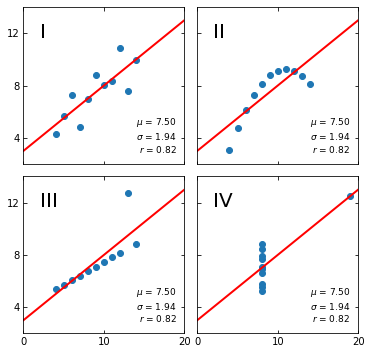

In [36]:
# https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    #bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, 
            transform=ax.transAxes, horizontalalignment='right')

plt.show()